# Theme Frequency Processing 

### Clean Interview Text → List of Responses

In [39]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
# for Original Fantuan App 
original_raw_text = """
1.) easy, not hard to do. Annoying thing was the information overload. VIP, ads. That was overwhelming. Other than that, the actual action was fine.  1.5 

2.)  Smilar, given I use UBER eats Familiar to me. food types are small, restuarutants icons are too small. I don't like scrolling to much 

3.) It's too vertical. I barely got to see any food. I want to see the customization options BEFORE I add it to my cart. So I can get it. 3.5

4.) Nothing really. Again, show me customization methods  before I add. 

5.) relatively easy to select a place. The address already being there helped. Way too many pop-up and screens. having to work with a new screen was annoying. Too many screens. 4.5 

6.) The sizing of the elemnts are strange. Why are the food type icons too small, while the checkout is good. The sizing isn't very homogenous. Too many pages. "
"1.) 2. the icon for Korean food was a little ahrd to find. 
2.) Layout was fine. List format was ok, the fact that they're all scrollable in one long scroll. 

3.) 6. Ordering the dish was fine, customizing was confusing, I couldn't ell which ones were customizable. It just tells me to add it to cart. NOt crippling, but slightly annoying. 
4.) consufion about how I can customize stuff was annoying. Having a custmization button would be good, beyond that just being told to add stuff to cart. 

5.) 1. Since it was already filled out. 
6.) NOthing comes to mind. "
"1.)  7. Made me feel stupid. I selected the korean section, it gave me chinese restaurants. 
2.) It's ok. I don't like how much I have to scroll. 

3.) 2. Customizng is really nice. It shows me all my options, and all I got to do is click on it. It's all very readable. THIS is all assuming the app actually works. 
4.) Advantage over the redesign, it can show off the food alot better. I find the full-width banner images for showing off the food is a better fit. I hate this app. 

5.) 2. It was very easy to select an address, them using geographical data was really helpful as well. ASAP delivery time is default, so I didn't even need to select it. 

6.) If it works, it's good. But when it doesn't, it's EXTREMLY frustring to use. Working meaning long load times, or the buttons being unresponsive. "
"1.) 6, it wasn't straightforward and the interface was very complicated. 
2.) Very crowded and colorful so it was kinda eye-straining.

3.) 7, very hard and complicated. Especially the customizing part was very challenging.
4.) No, not really.

5.) 2, it was easier than the rest of the tasks.
6.) I hated the pop-up ads. They were very annoying. Also the overall app was very confusing and crowded. "
"1.) 5, since it wasn't easy to find a korean restaurant.
2.) Although I chose a korean restaurant, the reastaurant that came up were japanese restaurants, whgich was very frustrating.

3.) 8, I did not like it at all, it was very overwhelming.
4.) When I selected the dish, the app asked me to put my phone number and my email address which was very unnnecessary at that stage.

5.) 4, it wasn't that complecated but still it was very crowded.
6.) I wish the app wasn't this colorful and messy. 
"""

# for Team's Redsigned prototype
redesigned_raw_text = """
1.) 1 (being easy). Options were streamlined. Sizing was more homogneous. 
2.) Don't like my address at the top. Don't like the deals section being on the main menu, I prefer it being on the restauratn menu, so it feels like I have a choice of what I'm ordering. 

3.) 2. I like that I can see the options before I added it to my cart. But how would this work on a phone? Woldn't this squish the options? The idea is nice, but I'm worried about the introduction. 
4.) I would prefer only seeing the dish I am customizing. Why am I seeing the other ones? 

5.) 7 as in difficult. In the app, it assumed earliet delivery time. What's the pin? I was unsure of what delivery time was. I would prfer seeing the options one at a time, all at once is overwhleming. This feels unnatural. THe optional nature of coupons and merchant message should be designed around. not a fan of the current 9 box layout. 

6.) The box system feels like it's priming me to pick one box. This sort of translates over to the delivery menu. The devliery options have a chronologically, but how do I figure out that chronology? the boxes lack chronology, I don't know the order in which I need to complete them. LAcking that chronology is an issue, what if one affects the choices of the other. I still have no idea which ones are optinal or not.  I prefer uber eats delivery menu (I've been using it for a long time). "
"1.) 2. IT felt the same as last time
2.) no, not really 
3.) 3. it was easier to see the customization options. The font was bad. 
4.) Font was annoying. 

5.) 5. Some of the information felt like it shold have been autofilled. What the heck was a pin? 
6.) Overall, the 2 dsigns were really comparable. "
"1.) 3. The restaurant doesn't immeditaely appear to me as korean. I had to search for the work korean 
2.) Pretty good. Everything is salient. It's hard to identify what nationarlity the restaurant belongs to . I ogtta read the names. 

3.) 2. the UI is tiny. There's all this space. Customization menu itself was very compact. Making it larger would be better. I'm unsure if this interface would fit on a phone. The position of the customiation menu wouldn't fit on the food. 
4.) Menu is nice. Menu was fast. Spacing is good for food. Naming of dishes is good. 

5.) 2. Why does the coupon button break the pattern established by the previous buttons? Same for the utensils button. The plus button is nice, but it would make snese to tap directly on the box itself. Place button is cute. 

6.) Progress bar is cool. The minimal design is cool. I'd be totally ok with this interface. Put icons in the delivery section to explain what each fieldd represents. Like a credit-card icon for the payment method section.  the place of the dish customization menu is not good. "
"1.) 2, it was pretty easy and straighforwared.
2.) Everything is pretty basic which makes evrything much more easier so I liked the simplicity.

3.) 2, again it was pretty easy.
4.) The font of customize section was pretty small so it was kinda hard to read.

5.) 1, since the info was already written.
6.) Overall I think it looks great, it's very easy to use and I really liked the idea of progress bar instead of scrolling forever :)"
"1.) 1, very easy.
2.) It's intuitive, clear

3.) 3, the font wasn't easy to read
4.) I think reading the extra toppings part was a little hard but not terrible. 

5.) 2, becuase I didn't need to write anything
6.) I think you dfid a great job, I would use this app instead of the original one for sure.
"""


### Preprocessing


In [ ]:

def parse_all_participants(raw_text):
    # Split the raw text by double newlines to separate participants
    participant_blocks = raw_text.split('"\n"')
    
    # Clean up the blocks (remove extra quotes at beginning and end)
    if participant_blocks[0].startswith('"'):
        participant_blocks[0] = participant_blocks[0][1:]
    if participant_blocks[-1].endswith('"'):
        participant_blocks[-1] = participant_blocks[-1][:-1]
    
    all_responses = []
    
    # Process each participant
    for block in participant_blocks:
        participant_responses = []
        
        # Process each question (1-6)
        for q_num in range(1, 7):
            pattern = rf"{q_num}\.\)(.*?)(?={q_num+1}\.\)|$)"
            matches = re.findall(pattern, block, re.DOTALL)
            
            if matches:
                participant_responses.append(matches[0].strip())
            else:
                # Try alternative pattern
                alt_pattern = rf"{q_num}\.\)(.*?)(?=\n\d+\.\)|$)"
                alt_matches = re.findall(alt_pattern, block, re.DOTALL)
                if alt_matches:
                    participant_responses.append(alt_matches[0].strip())
                else:
                    participant_responses.append("")  # Empty response if not found
        
        # Only add non-empty response sets
        if any(response for response in participant_responses):
            all_responses.append(participant_responses)
    
    return all_responses


# Parse both sets of interviews
original_responses = parse_all_participants(original_raw_text)
redesigned_responses = parse_all_participants(redesigned_raw_text)



In [38]:
# Check how many participants we have
print(f"Original app: {len(original_responses)} participants")
print(f"Redesigned app: {len(redesigned_responses)} participants")

# Print a sample to verify parsing worked correctly
print("\nSample of processed responses (Participant 1, Original app):")
for i, resp in enumerate(original_responses[0], 1):
    print(f"Response {i}: {resp[:50]}...")

Original app: 5 participants
Redesigned app: 5 participants

Sample of processed responses (Participant 1, Original app):
Response 1: easy, not hard to do. Annoying thing was the infor...
Response 2: Smilar, given I use UBER eats Familiar to me. food...
Response 3: It's too vertical. I barely got to see any food. I...
Response 4: Nothing really. Again, show me customization metho...
Response 5: relatively easy to select a place. The address alr...
Response 6: The sizing of the elemnts are strange. Why are the...


### Theme Identification

In [21]:
original_themes = {
    "Information Overload": ["overload", "overwhelming", "too much information", "crowded", "messy"],
    "Small UI Elements": ["small", "tiny", "hard to read", "can't see"],
    "Poor Layout/Too Much Scrolling": ["scroll", "vertical", "layout", "too long"],
    "Customization Issues": ["customiz", "options", "can't tell", "before I add", "confusing"],
    "Too Many Screens/Pop-ups": ["pop-up", "too many screens", "too many pages", "new screen"],
    "Inconsistent UI Sizing": ["sizing", "homogenous", "strange", "too small", "size isn't"],
    "Search/Navigation Difficulties": ["hard to find", "couldn't find", "made me feel stupid", "navigation"],
    "App Performance Issues": ["doesn't work", "load time", "unresponsive", "button"],
    "Cluttered/Overwhelming Interface": ["cluttered", "overwhelming", "colorful", "eye-straining", "messy"],
    "Unnecessary Steps": ["unnecessary", "phone number", "email", "too many steps"]
}

# Define themes and associated keywords for the redesigned app
redesigned_themes = {
    "Clear/Streamlined Interface": ["streamlined", "clear", "intuitive", "easy"],
    "Address/Location Issues": ["address", "top", "location", "autofill"],
    "Better Customization Options": ["customiz", "see the options", "before I added"],
    "Font Issues": ["font", "hard to read", "small"],
    "Confusing Checkout Process": ["confusing", "difficult", "pin", "unsure", "overwhelm"],
    "Unclear Button Purpose": ["button", "unclear", "coupon", "break the pattern"],
    "Compact/Space Utilization": ["compact", "space", "tiny", "larger"],
    "Progress Bar Appreciation": ["progress bar", "cool", "instead of scrolling"],
    "Unclear UI Elements": ["unclear", "what the heck", "unsure", "hard to identify"],
    "Simplicity/Ease of Use": ["simple", "basic", "easier", "great"]
}

In [22]:
# Function to count theme occurrences in responses
def count_theme_occurrences(responses, themes_dict):
    theme_counts = {theme: 0 for theme in themes_dict}
    
    for participant_responses in responses:
        for response in participant_responses:
            response_lower = response.lower()
            
            for theme, keywords in themes_dict.items():
                if any(keyword.lower() in response_lower for keyword in keywords):
                    theme_counts[theme] += 1
    
    return theme_counts

# Count theme occurrences
original_theme_counts = count_theme_occurrences(original_responses, original_themes)
redesigned_theme_counts = count_theme_occurrences(redesigned_responses, redesigned_themes)


In [ ]:
# display results
print("\nOriginal App Theme Counts:")
for theme, count in original_theme_counts.items():
    print(f"{theme}: {count}")
print("\nRedesigned App Theme Counts:")
for theme, count in redesigned_theme_counts.items():
    print(f"{theme}: {count}")


Original App Theme Counts:
Information Overload: 6
Small UI Elements: 2
Poor Layout/Too Much Scrolling: 4
Customization Issues: 7
Too Many Screens/Pop-ups: 3
Inconsistent UI Sizing: 2
Search/Navigation Difficulties: 1
App Performance Issues: 2
Cluttered/Overwhelming Interface: 4
Unnecessary Steps: 1

Redesigned App Theme Counts:
Clear/Streamlined Interface: 7
Address/Location Issues: 3
Better Customization Options: 6
Font Issues: 4
Confusing Checkout Process: 4
Unclear Button Purpose: 2
Compact/Space Utilization: 1
Progress Bar Appreciation: 2
Unclear UI Elements: 4
Simplicity/Ease of Use: 4


### Create Theme Frequency Table

In [27]:
# Sort themes by frequency (descending)
sorted_original_themes = sorted(original_theme_counts.items(), key=lambda x: x[1], reverse=True)
sorted_redesigned_themes = sorted(redesigned_theme_counts.items(), key=lambda x: x[1], reverse=True)

# Create DataFrames
original_df = pd.DataFrame(sorted_original_themes, columns=['Theme', 'Frequency'])
redesigned_df = pd.DataFrame(sorted_redesigned_themes, columns=['Theme', 'Frequency'])


In [30]:
# Display the frequency tables

print("\nOriginal App Theme Frequencies:")
original_df



Original App Theme Frequencies:


,Theme,Frequency
0,Customization Issues,7
1,Information Overload,6
2,Poor Layout/Too Much Scrolling,4
3,Cluttered/Overwhelming Interface,4
4,Too Many Screens/Pop-ups,3
5,Small UI Elements,2
6,Inconsistent UI Sizing,2
7,App Performance Issues,2
8,Search/Navigation Difficulties,1
9,Unnecessary Steps,1


In [ ]:
# Display the frequency tables

print("\nRedesigned App Theme Frequencies:")
redesigned_df


Redesigned App Theme Frequencies:


,Theme,Frequency
0,Clear/Streamlined Interface,7
1,Better Customization Options,6
2,Font Issues,4
3,Confusing Checkout Process,4
4,Unclear UI Elements,4
5,Simplicity/Ease of Use,4
6,Address/Location Issues,3
7,Unclear Button Purpose,2
8,Progress Bar Appreciation,2
9,Compact/Space Utilization,1


### Export to csv

In [41]:
combined_results = pd.DataFrame({
    'Original Theme': original_df['Theme'],
    'Original Frequency': original_df['Frequency'],
    'Redesigned Theme': redesigned_df['Theme'] if len(redesigned_df) >= len(original_df) else redesigned_df['Theme'].tolist() + [''] * (len(original_df) - len(redesigned_df)),
    'Redesigned Frequency': redesigned_df['Frequency'] if len(redesigned_df) >= len(original_df) else redesigned_df['Frequency'].tolist() + [0] * (len(original_df) - len(redesigned_df))
})

# Export to CSV
combined_results.to_csv('fantuan_app_theme_comparison.csv', index=False)

# Visualization
### Frequancy bar charts

/var/folders/0y/hfr2tl3x3cd_pbhyh8n9yds00000gn/T/ipykernel_11959/265260402.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Theme', data=original_df, palette=colors1, ax=ax1)
/var/folders/0y/hfr2tl3x3cd_pbhyh8n9yds00000gn/T/ipykernel_11959/265260402.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Theme', data=redesigned_df, palette=colors2, ax=ax2)


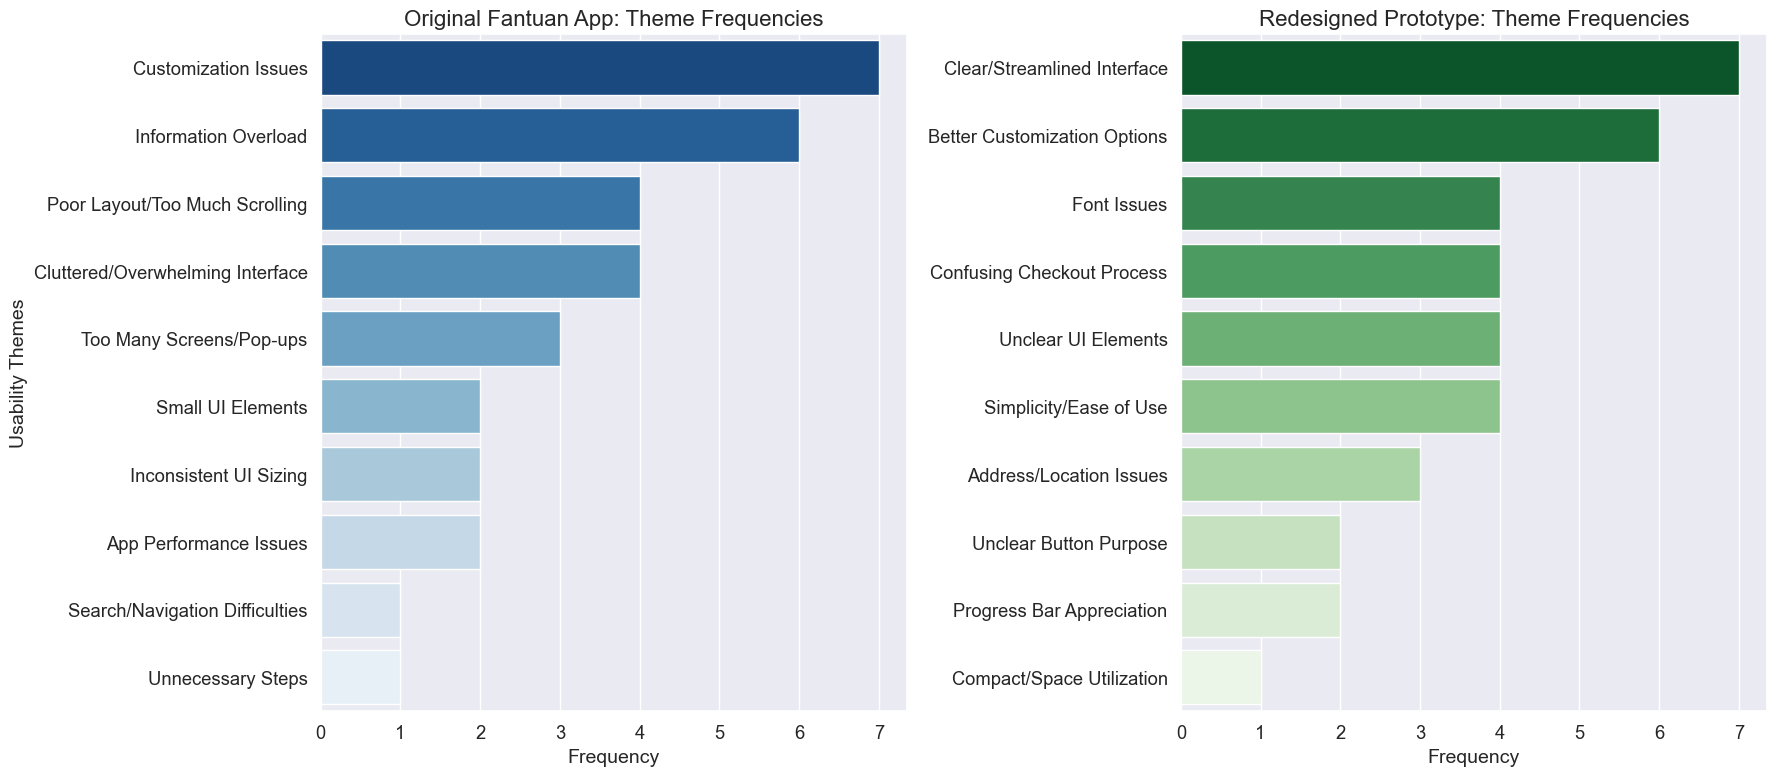

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Color palette
colors1 = sns.color_palette("Blues_r", len(original_df))
colors2 = sns.color_palette("Greens_r", len(redesigned_df))

# Plot for Original App
sns.barplot(x='Frequency', y='Theme', data=original_df, palette=colors1, ax=ax1)
ax1.set_title('Original Fantuan App: Theme Frequencies', fontsize=16)
ax1.set_xlabel('Frequency', fontsize=14)
ax1.set_ylabel('Usability Themes', fontsize=14)

# Plot for Redesigned App
sns.barplot(x='Frequency', y='Theme', data=redesigned_df, palette=colors2, ax=ax2)
ax2.set_title('Redesigned Prototype: Theme Frequencies', fontsize=16)
ax2.set_xlabel('Frequency', fontsize=14)
ax2.set_ylabel('')  # No need for y-label on the right plot

# Tight layout
plt.tight_layout()
plt.show()